In [1]:
### START REQUIRED PACKAGES

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math

sp.random.seed(30)

In [2]:
### Initial variables

steps = 10**5 # time steps
dt = .001 # step size
dt2 = dt**2

# time is steps*dt

### Dimensions

L = 1 # for periodic boundary conditions

In [3]:
### This defines the functions for the Rouse values

def rouse(x,p):
    return sum(x[k]*np.cos(np.pi*p*k/N) for k in range(N))/float(N)

def Squarer(x,p):
    return sum((x[k]*np.cos(np.pi*p*k/N))**2 for k in range(N))

def top_value(x,y,p):
            
    return sum(x[i]*y[j]*np.cos(np.pi*p*i/N)*np.cos(np.pi*p*j/N) for i in range(N) for j in range(N))

### This defines the force

def harmonic(x):
    values = np.zeros(N,float)

    if N <= 2:
        values[0] = k*(x[1] - x[0])
        values[1] = k*(x[0] - x[1])
    else:
        values[0] = k*(x[1] - x[0])
        for j in range(1,N-1):
            values[j] = k*(x[j-1]-2*x[j]+x[j+1])
        values[N-1] = k*(x[N-2] - x[N-1])
        
    return values

### This gives increments to the Wiener process

def random(dt):
    a, b = sp.random.uniform(low=0.0,high=1.0), sp.random.uniform(low=0.0,high=1.0)
    
    return math.sqrt(-2*dt*np.log(a))*np.cos(2*np.pi*b)


### This defines the initial velocity with values from the Maxwell-Boltzmann distribution

def velocities(temp):
    sigma = math.sqrt(k_b*temp/m)
    
    array = np.random.normal(0,sigma,N)
    
    # Ensure no COM drift
    array -= sum(array)/float(N)
    
    # Rescale to set temperature
    scale_factor = (3*N*k_b*temp)/sum(array*array)
    
    array *= scale_factor
    
    return array

In [5]:
%%time
### This defines the variables to be used

N = 100 # NUMBER OF PARTICLES
p = 1 # This sets the value of the pth mode
T = 1 # Temperature


### This defines the constants
k_b = 1 # boltzmann constant
m = 1 # mass of bead
friction = 1 # Value of friction coefficient
b = (3*k_b*np.pi**2/friction)**(1/2) # average bonding length
k = 3*k_b*T/(b**2)
amp = 1 #amplitude of noise
τ = 1 #correlation of noise

# Initialize particle positions, velocities, accelerations, and Wiener process
x = sp.random.uniform(0,L,size=N)
v = velocities(T)
acc = harmonic(x)

brownian = sp.random.uniform(low=0.0,high=1.0,size=N)

x_0 = np.copy(x)

# Initialize Rouse arrays
# r_top = np.zeros(steps+1)

# r_top[0] = top_value(x,x_0,p)
# denom = r_top[0]

# Mean square displacement
msd = np.zeros(steps+1)
msd[0] = 0

msd_cent = np.zeros(steps+1)
msd_cent[0] = 0
init_rouse = rouse(x_0,p)

for ts in range(1,steps+1):
    
    # Update position
    x += (harmonic(x)+amp*np.sin(math.sqrt(2/τ)*brownian))*(dt/friction)
    
    # Update Rouse mode
#     r_top[ts] = top_value(x,x_0,p)

    # Update Brownian
    brownian +=
    
    # update MSD
    dx_1 = 0
    for i in range(N):
        dx_1 += (x[i]-x_0[i])**2
        
    msd[ts] += dx_1
    
    # update MSD_cent
    dx_2 = 0
    for i in range(N):
        dx_2 += (rouse(x,0)-init_rouse)**2
        
    msd_cent[ts] += dx_2
    
# r_top *= 1/denom
msd /= float(N)
msd_cent /= float(N)
    
# np.savetxt("N10_p10_R1_T10_F1.txt",r_top)
# np.savetxt("N10_p10_R1_T10_F1.txt",r_top)

# tarray = np.arange(0,(steps+1)*dt,dt)

# fig = plt.figure(figsize=(10, 6), dpi=200)
# ax = fig.add_subplot(111)
# plt.semilogx(tarray,r_top)
# plt.xlabel('Time')
# plt.ylabel('$<R_p(t)R_p(0)>/<|R_p(0)|^2>$')
# plt.show()

Wall time: 23min 2s


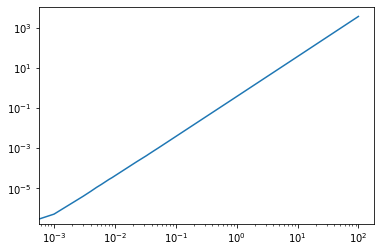

In [7]:
tarray = np.arange(0,(steps+1)*dt,dt)

plt.loglog(tarray,msd)

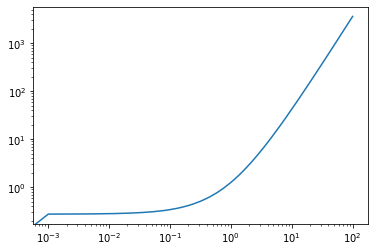

In [8]:
plt.loglog(tarray,msd_cent)

In [9]:
# np.savetxt("N30_p1_R1_T1_F1.txt",r_top)
np.savetxt("MSD_N100_p1_R1_T1_F1.txt",msd)
np.savetxt("MSD_cent_N100_p1_R1_T1_F1.txt",msd_cent)